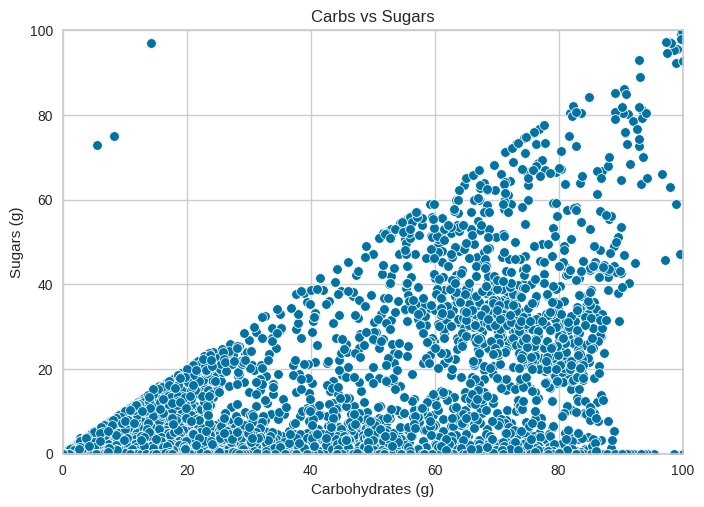

0.5831649828010718


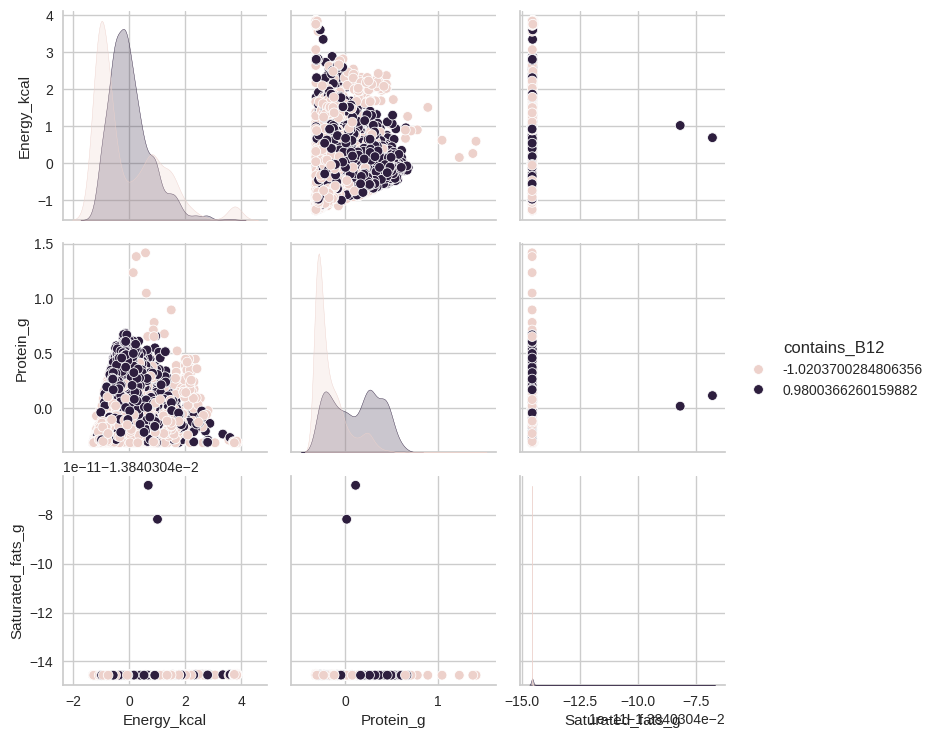

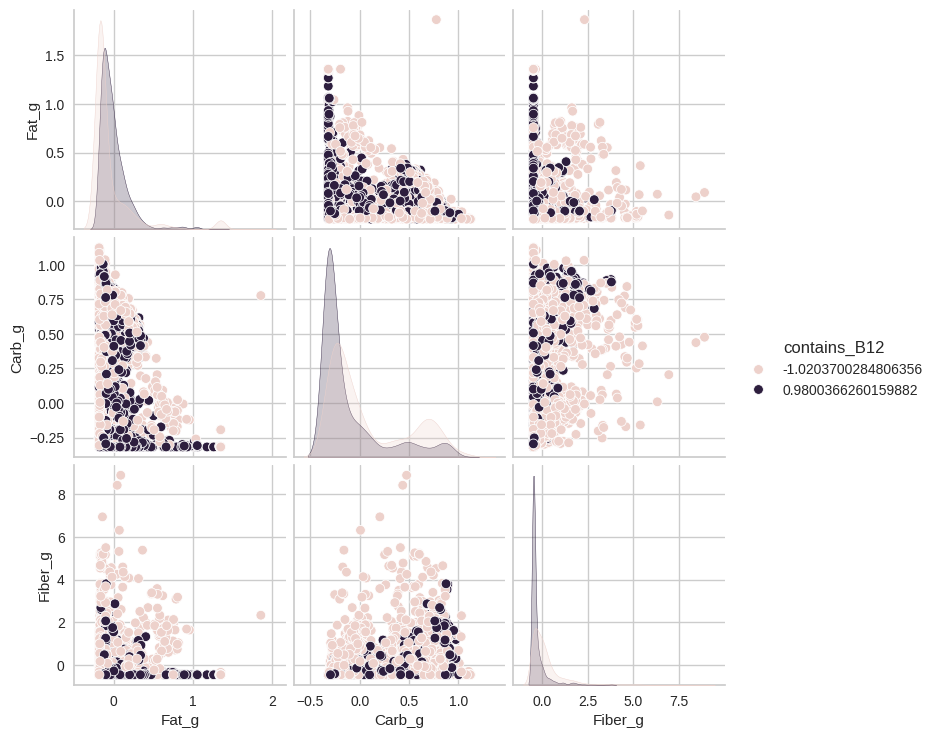

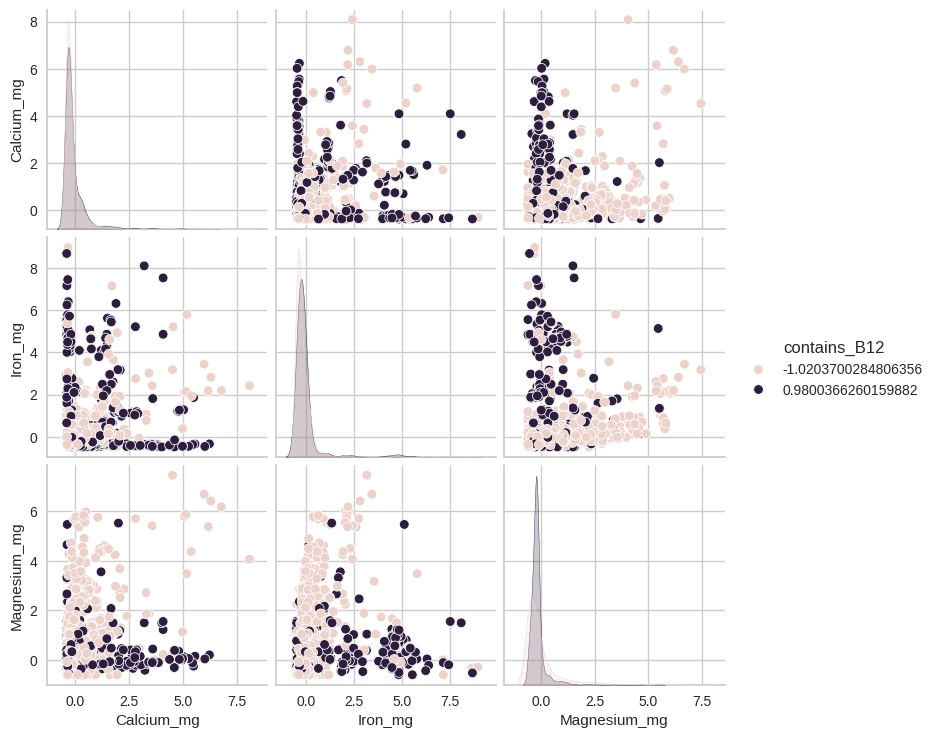

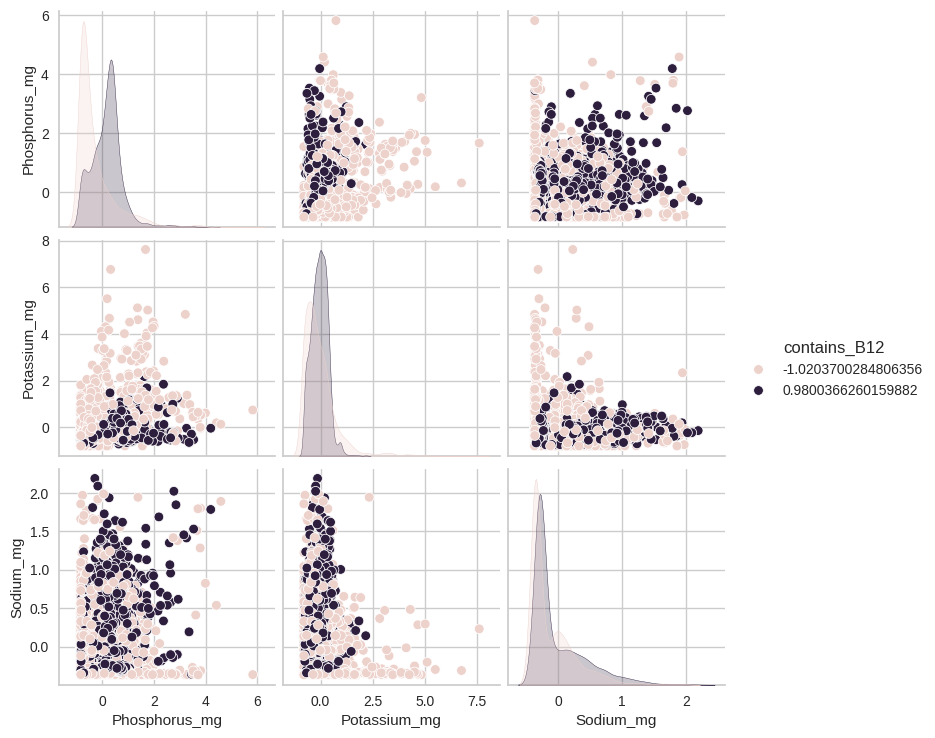

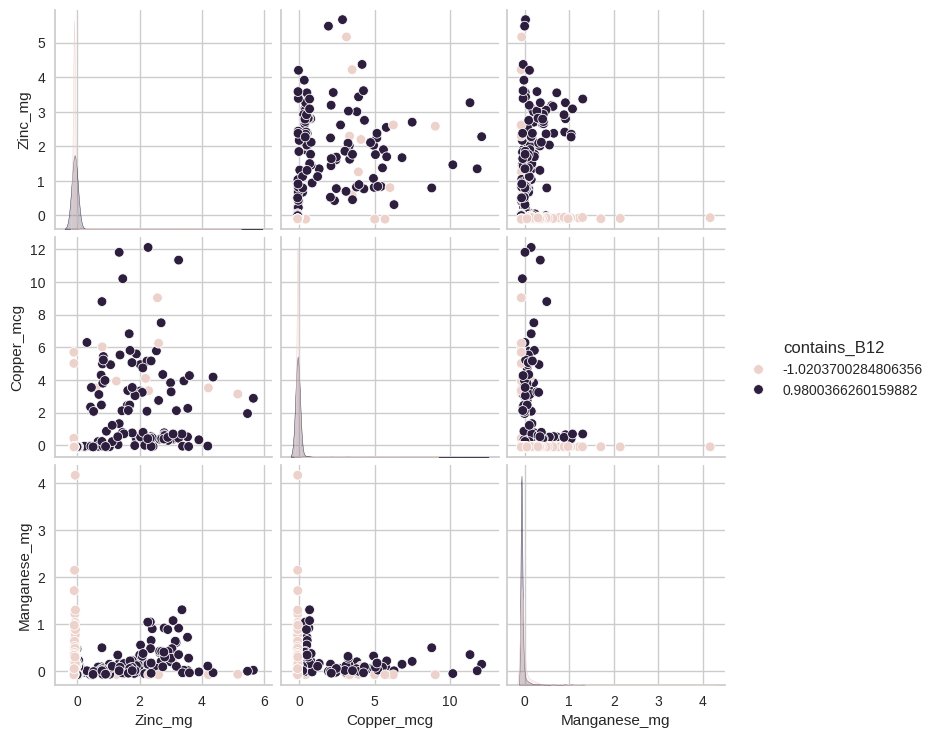

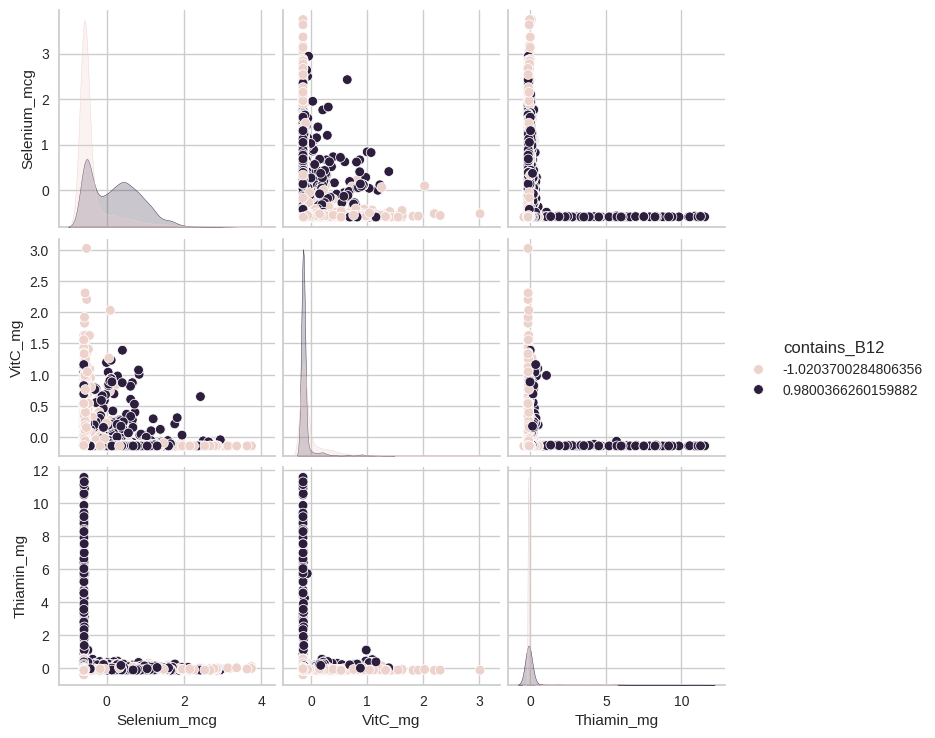

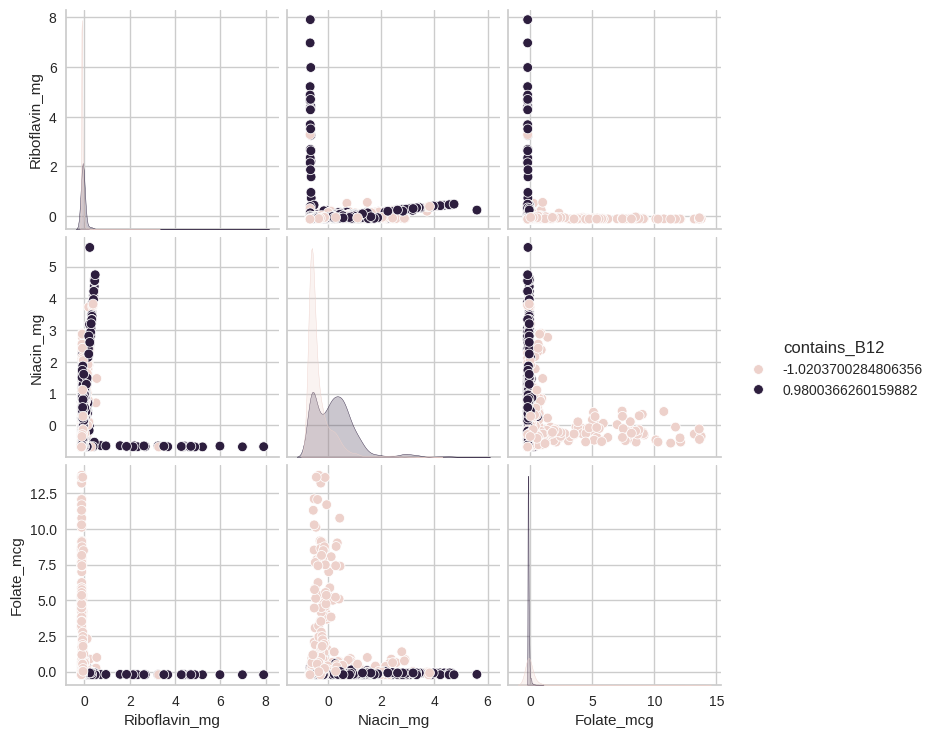

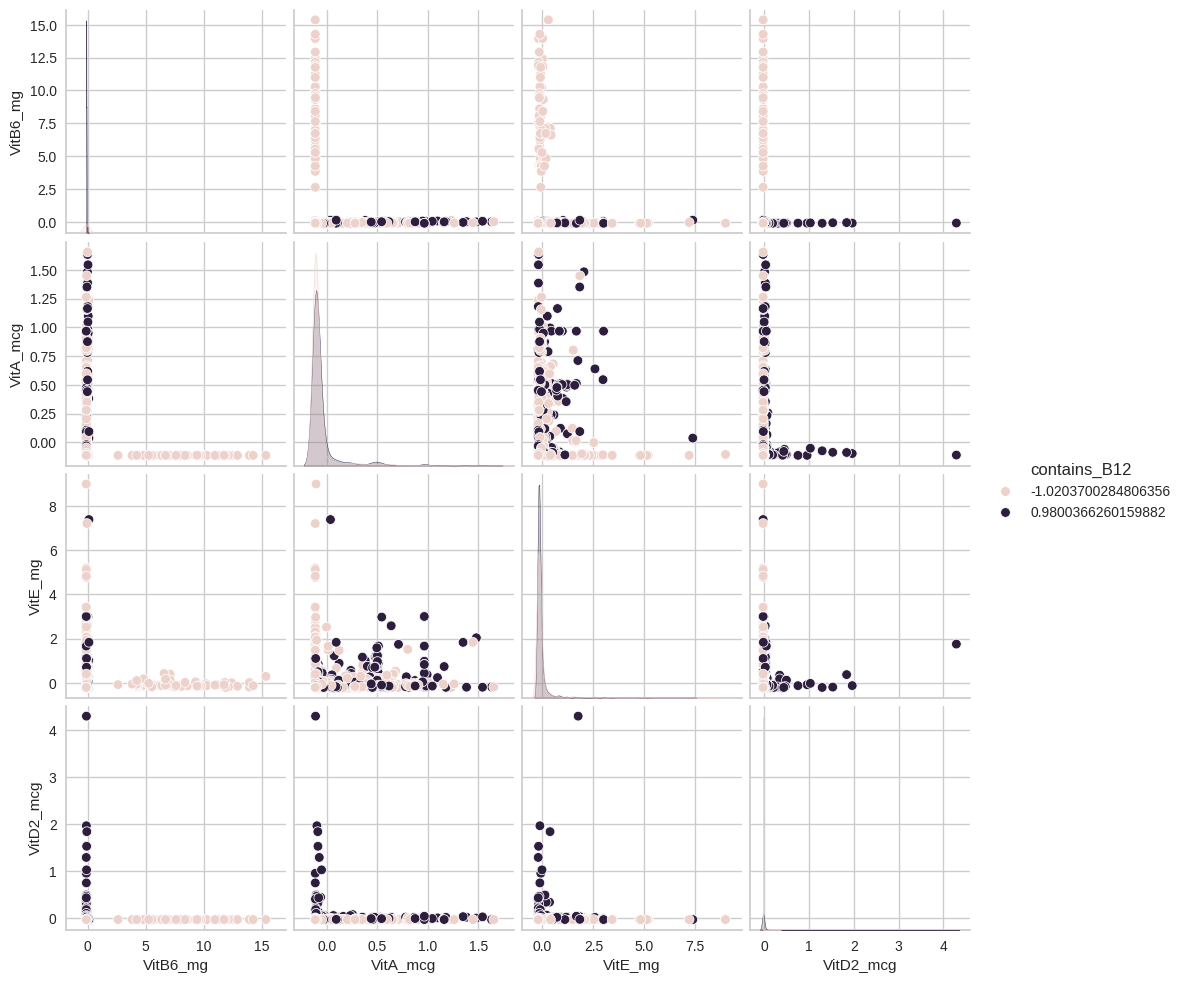

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from yellowbrick.cluster import SilhouetteVisualizer

# format columns and add computed columns
def preprocess(data):
    data["Energy_kcal"] = data["Energy_kcal"].round()
    data["Magnesium_mg"] = pd.to_numeric(data["Magnesium_mg"], errors="coerce")
    data["VitE_mg"] = pd.to_numeric(data["VitE_mg"], errors="coerce")
    data["contains_B12"] = data["VitB12_mcg"] != 0.0

def plot_graphs(data):
    data.describe()
    sns.pairplot(data, vars=["Energy_kcal", "Protein_g", "Saturated_fats_g"], hue="contains_B12")
    sns.pairplot(data, vars=["Fat_g", "Carb_g", "Fiber_g"], hue="contains_B12")
    sns.pairplot(data, vars=["Calcium_mg", "Iron_mg", "Magnesium_mg"], hue="contains_B12")
    sns.pairplot(data, vars=["Phosphorus_mg", "Potassium_mg", "Sodium_mg"], hue="contains_B12")
    sns.pairplot(data, vars=["Zinc_mg", "Copper_mcg", "Manganese_mg"], hue="contains_B12")
    sns.pairplot(data, vars=["Selenium_mcg", "VitC_mg", "Thiamin_mg"], hue="contains_B12")
    sns.pairplot(data, vars=["Riboflavin_mg", "Niacin_mg", "Folate_mcg"], hue="contains_B12")
    sns.pairplot(data, vars=["VitB6_mg", "VitA_mcg", "VitE_mg", "VitD2_mcg"], hue="contains_B12")

data = pd.read_csv("ingredients.csv", keep_default_na=True)
data.index.name = "id"
non_test_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, validation_data = train_test_split(non_test_data, test_size=0.25, random_state=42)
train_desctip = train_data.pop("Descrip")

preprocess(train_data)

pipe_prepro = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy="median"),
    StandardScaler()
)
train_data = pd.DataFrame(pipe_prepro.fit_transform(train_data), columns=train_data.columns)
pipe_factor = make_pipeline( LocalOutlierFactor(n_neighbors = 30))
label = pipe_factor.fit_predict(train_data)
train_data = train_data[label == 1].reset_index(drop=True)

sns.scatterplot(x=data['Carb_g'], y=data['Sugar_g'])
plt.title('Carbs vs Sugars')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Sugars (g)')
plt.xlim(0, 100) 
plt.ylim(0, 100)
plt.show()
print(train_data['Carb_g'].corr(train_data['Sugar_g']))
plot_graphs(train_data)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10250 entries, 0 to 10249
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Descrip           10250 non-null  object 
 1   Energy_kcal       10246 non-null  float64
 2   Protein_g         10248 non-null  float64
 3   Saturated_fats_g  10245 non-null  float64
 4   Fat_g             10243 non-null  float64
 5   Carb_g            9889 non-null   float64
 6   Fiber_g           9889 non-null   float64
 7   Sugar_g           10248 non-null  float64
 8   Calcium_mg        10247 non-null  float64
 9   Iron_mg           10244 non-null  float64
 10  Magnesium_mg      10246 non-null  object 
 11  Phosphorus_mg     10248 non-null  float64
 12  Potassium_mg      10247 non-null  float64
 13  Sodium_mg         10247 non-null  float64
 14  Zinc_mg           10247 non-null  float64
 15  Copper_mcg        10248 non-null  float64
 16  Manganese_mg      10246 non-null  float6

array([[<AxesSubplot: xlabel='Sugar_g', ylabel='Sugar_g'>,
        <AxesSubplot: xlabel='Carb_g', ylabel='Sugar_g'>],
       [<AxesSubplot: xlabel='Sugar_g', ylabel='Carb_g'>,
        <AxesSubplot: xlabel='Carb_g', ylabel='Carb_g'>]], dtype=object)

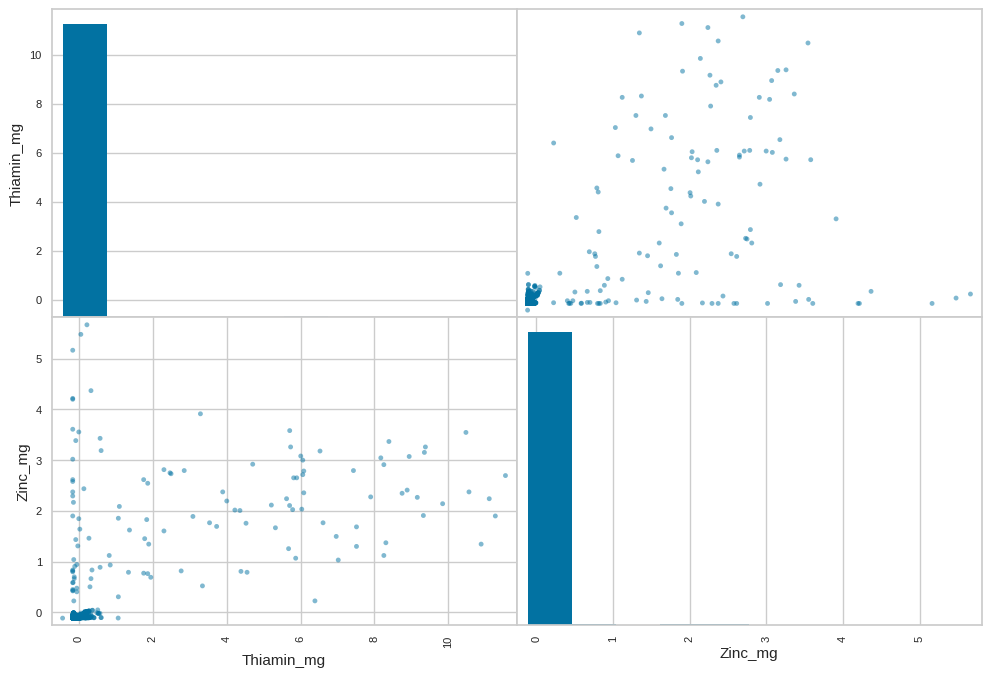

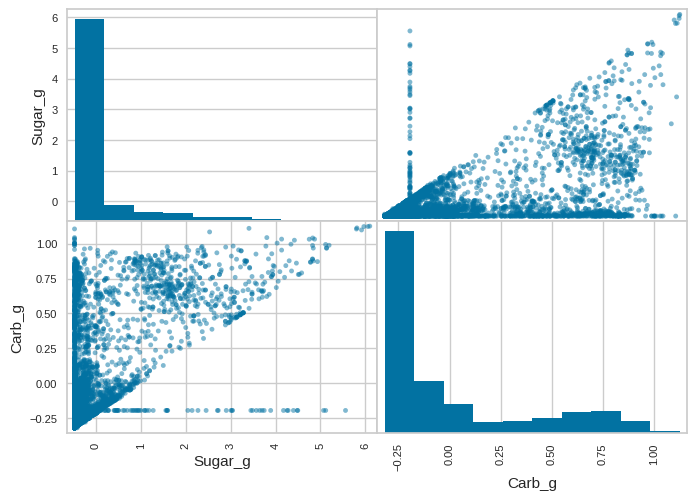

In [9]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm').format("{:.2f}")
# plot_graphs(train_data)
from pandas.plotting import scatter_matrix
scatter_matrix(train_data[["Thiamin_mg", "Zinc_mg"]], figsize=(12, 8))
scatter_matrix(train_data[["Sugar_g", "Carb_g"]])

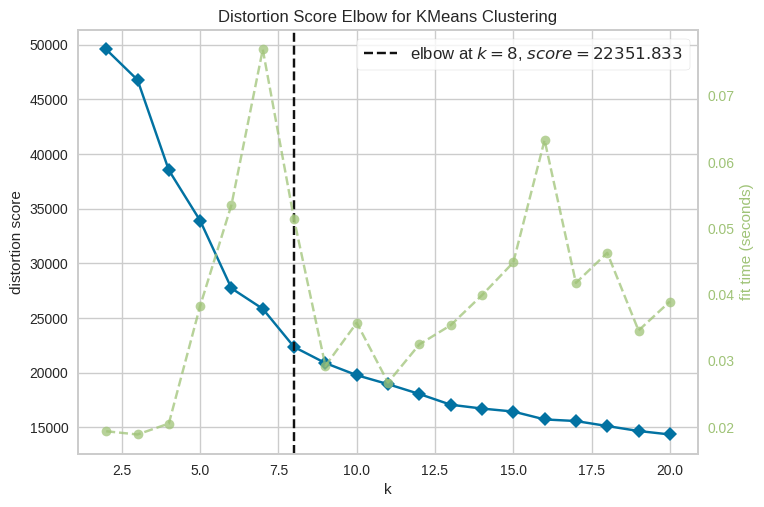

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
## elbow find best k for k means
from yellowbrick.cluster import  KElbowVisualizer

km = KMeans(n_clusters=3, random_state=42)
elbow = KElbowVisualizer(km, k=(2,21))
elbow.fit(train_data)
elbow.show()

# for k in range(19):
#     means.append(k+1)
#     km = KMeans(n_clusters=k+1, random_state=42)
#     vis = SilhouetteVisualizer(km)
#     vis.fit(train_data)

In [17]:
km = KMeans(n_clusters=16, random_state=42)
km.fit(train_data)

KMeans(n_clusters=16, random_state=42)

In [ ]:
# train_data[(train_data.Iron_mg < 10.0)].Iron_mg.hist()
# train_data[(train_data.Iron_mg < 10.0) & (train_data.contains_B12 == False)].Iron_mg.hist()
# train_data[(train_data.Iron_mg < 10.0) & (train_data.contains_B12)].Iron_mg.hist()
# train_data[(train_data.Iron_mg < 10.0) & (train_data.contains_B12) == False].Iron_mg.hist()